Trial

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\data\household_power_consumption.txt",delimiter=";")
df.head()

C:\Users\navee\AppData\Local\Temp\ipykernel_12436\2954414610.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\navee\OneDrive\Documents\Courses\Projects\electricity_consumption_ML\data\household_power_consumption.txt",delimiter=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
df.shape

(2075259, 9)

In [6]:
df.isna().sum()*100/df.shape[0]

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

In [7]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
df[df['Sub_metering_1']=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [9]:
cols = [col for col in df.columns if col not in ['Date','Time']]
df[cols] = df[cols].replace('?',np.nan)
df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')
df[cols] = df[cols].fillna(df[cols].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
df[df['Global_active_power']=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

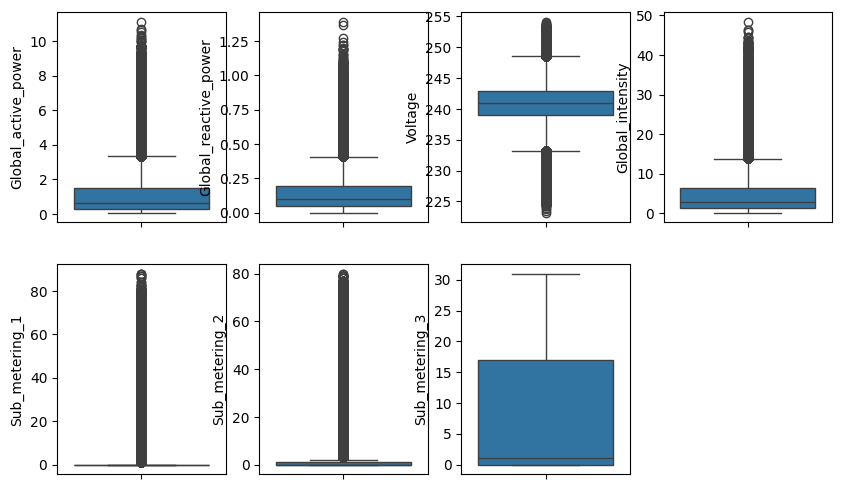

In [ ]:
plt.figure(figsize=(10,6))
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(df[col])
    i+=1
plt.show()

In [16]:
#Handling outliers

df[cols].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [21]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [29]:
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    df = df[(df[col] >= (q1 - 1.5*iqr)) & (df[col] <= (q3 + 1.5*iqr))]
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
30,16/12/2006,17:54:00,2.720,0.000,235.06,11.6,0.0,0.0,17.0
35,16/12/2006,17:59:00,2.472,0.058,236.94,10.4,0.0,0.0,17.0
36,16/12/2006,18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0
37,16/12/2006,18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0
38,16/12/2006,18:02:00,2.772,0.118,238.28,11.6,0.0,0.0,17.0


In [31]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.713101e+06,1.713101e+06,1.713101e+06,1.713101e+06,1713101.0,1.713101e+06,1.713101e+06
mean,8.252127e-01,1.102551e-01,2.412646e+02,3.491578e+00,0.0,3.425455e-01,5.590106e+00
std,6.902636e-01,9.455635e-02,2.762690e+00,2.845943e+00,0.0,6.170047e-01,8.110538e+00
min,7.600000e-02,0.000000e+00,2.338000e+02,2.000000e-01,0.0,0.000000e+00,0.000000e+00
25%,2.900000e-01,4.600000e-02,2.395300e+02,1.200000e+00,0.0,0.000000e+00,0.000000e+00
50%,4.380000e-01,9.600000e-02,2.413100e+02,2.000000e+00,0.0,0.000000e+00,1.000000e+00
75%,1.384000e+00,1.780000e-01,2.430700e+02,5.800000e+00,0.0,1.000000e+00,1.700000e+01
max,3.162000e+00,3.980000e-01,2.484700e+02,1.280000e+01,0.0,2.000000e+00,3.100000e+01


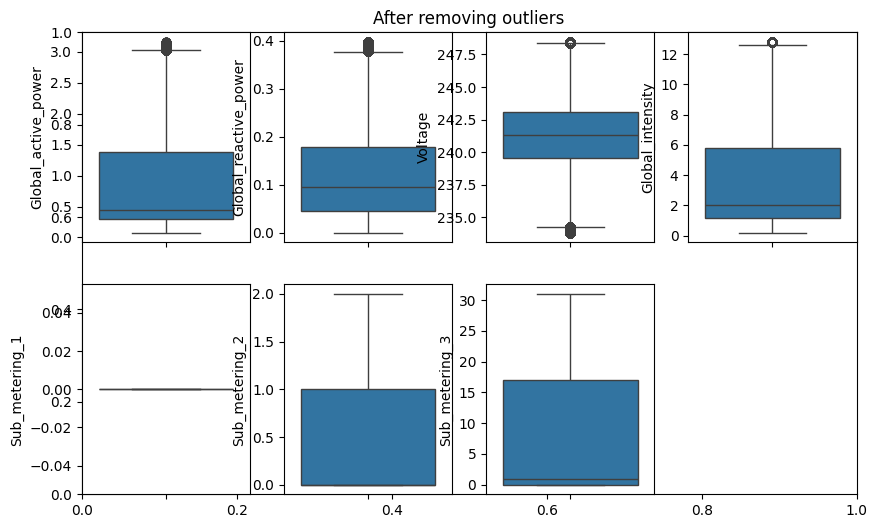

In [30]:
plt.figure(figsize=(10,6))
plt.title('After removing outliers')
i=1
for col in cols:
    plt.subplot(2,4,i)
    sns.boxplot(df[col])
    i+=1
plt.show()

In [32]:
df.shape

(1713101, 9)

In [34]:
#Pair plots
import seaborn as sns
sns.pairplot(df)

Error in callback <function flush_figures at 0x000001C516A50F40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
df['act_engy_consumed_per_min'] = (df.Global_active_power*1000)/60 - df.Sub_metering_1 - df.Sub_metering_2 - df.Sub_metering_3

In [37]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,act_engy_consumed_per_min
30,16/12/2006,17:54:00,2.720,0.000,235.06,11.6,0.0,0.0,17.0,28.333333
35,16/12/2006,17:59:00,2.472,0.058,236.94,10.4,0.0,0.0,17.0,24.200000
36,16/12/2006,18:00:00,2.790,0.180,237.52,11.8,0.0,0.0,18.0,28.500000
37,16/12/2006,18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,26.733333
38,16/12/2006,18:02:00,2.772,0.118,238.28,11.6,0.0,0.0,17.0,29.200000


Date                     26/11/2010
Time                       21:02:00
Global_active_power           0.932
Global_reactive_power           0.0
Voltage                      239.55
Name: 2075258, dtype: object

In [45]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=42)
x_train.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1212859,6/4/2009,23:43:00,1.432,0.000,245.01,5.8,0.0,0.0,18.0
204330,7/5/2007,14:54:00,0.238,0.112,237.43,1.0,0.0,0.0,0.0
1005445,13/11/2008,22:49:00,2.256,0.108,242.84,9.2,0.0,0.0,18.0
1493234,18/10/2009,16:38:00,0.248,0.056,239.13,1.0,0.0,0.0,1.0
1823102,4/6/2010,18:26:00,0.342,0.208,241.18,1.6,0.0,0.0,1.0


In [48]:
x_test.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1369765,24/7/2009,22:49:00,0.376,0.186,244.81,2.0,0.0,0.0,3.0
1233255,21/4/2009,03:39:00,1.384,0.094,241.24,5.6,0.0,1.0,0.0
667439,24/3/2008,05:23:00,0.226,0.000,246.43,1.0,0.0,0.0,0.0
1466530,30/9/2009,03:34:00,0.252,0.122,242.14,1.2,0.0,0.0,1.0
1566421,8/12/2009,12:25:00,1.440,0.112,245.23,5.8,0.0,0.0,19.0


In [49]:
y_test.head()

,act_engy_consumed_per_min
1369765,3.266667
1233255,22.066667
667439,3.766667
1466530,3.200000
1566421,5.000000
